<a href="https://colab.research.google.com/github/Ianmzi/Potential-neuronal-action/blob/main/H%26H.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introducción al sistema.
El modelo planteado para

$\textbf{El potencial de membrana:}$
\begin{eqnarray}
\frac{dV}{dt} = \frac{I_{inyec} - \bar{g}_l(V-E_l) - \bar{g}_{Na} m_{\infty}(V) (V-E_{Na}) - \bar{g}_K n (V-E_K)}{C_m }\\
\end{eqnarray}
$\textbf{El cambio en la aactivación de los canales de potasio:}$
\begin{eqnarray}
\frac{dn}{dt} = \frac{n_{\infty}(V) - n}{\tau_n}\\
\end{eqnarray}

In [2]:
import numpy as np
import matplotlib.pylab as gr
import sympy as sm
import matplotlib.patches as mpatches

In [3]:
# 1. Definición de Parámetros y Funciones Auxiliares
q_neuro = {
    'C_m': 1.0,
    'g_L': 8, #0.3,
    'E_L': -80, #-54.4, # potencial de reposo recalibrado
    'g_Na': 20, #120.0,
    'E_Na': 60, # 50.0,
    'g_K': 10, #36.0,
    'E_K': -100, # -77.0,
    'I_inyec': 4.8, #10.0,

    # INACTIVACIÓN
    'Vm': -40.0,  # mV voltaje medio de inactivación del sodio
    'kn': -6.0,  # mV inactivación del sodio
    'tau_n': 5.0, # constante de tiempo para generar histéresis

    # Parámetros para el sodio rápido (m)
    'Vm_m': -40.0,
    'km': -6.0,

    # Configuración de simulación RK4
    'h': 0.05,
    'tinit': 0,
    'tfinal': 60
}

V_half_n = -40
kn = 6
V_half_m = -20
km = 16

In [4]:
    # Definir la función numérica RK4 que contiene las cond. iniciales ic, la función f que define al sistema de EDOs y de un
    # diccionario que contiene los parámetros p de la simulación.
def RK4vec(ic, f, p):
      # Crear un array que representa los puntos en el tiempo con un tamaño de paso h
      t = np.arange(p['tinit'], p['tfinal'], p['h'])
      # Crear la matriz de solución U donde cada fila representa un instante de tiempo y cada columna una variable del sistema
      U = np.zeros((len(t), len(ic)))   # U es un vector de dos elementos
      # Establecer condiciones iniciales para la primera fila t[0]
      U[0] = ic

      # Calcular para las demás filas definiendo RK4 cómo se vió en clase
      for i in range(1,len(t)):
        k1 = f(U[i-1])*p['h']
        k2 = f(U[i-1]+k1/2)*p['h']
        k3 = f(U[i-1]+k2/2)*p['h']
        k4 = f(U[i-1]+k3)*p['h']
        U[i] = U[i-1]+(k1+2*k2+2*k3+k4)/6

      # Se transpone la matriz para que cada fila corresponda a una variable y cada columna a un instante de tiempo
      return U.transpose()

In [5]:
# Función Sigmoide de Boltzmann
def sigmoide_vec(V, V_half, k):
    return 1.0 / (1.0 + np.exp((V_half - V) / k))

# Sistema de Ecuaciones
def modelo_neurona(U):
    V, n = U

    m_val = 1.0 / (1.0 + np.exp((V_half_m - V) / km))
    n_inf_val = 1.0 / (1.0 + np.exp((V_half_n - V) / kn))
    dn = (n_inf_val - n) / q_neuro['tau_n']

    # Corrientes
    I_L = q_neuro['g_L'] * (V - q_neuro['E_L'])
    I_Na = q_neuro['g_Na'] * m_val * (V - q_neuro['E_Na'])
    I_K = q_neuro['g_K'] * n * (V - q_neuro['E_K'])
    dV = (q_neuro['I_inyec'] - I_L - I_Na - I_K) / q_neuro['C_m']

    return np.array([dV, dn])

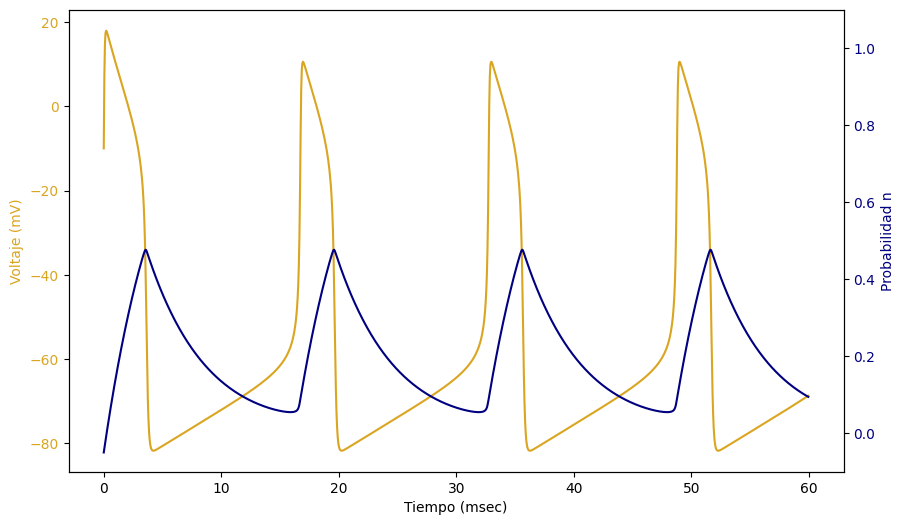

In [6]:
# Una vez definidos los elementos de RK4, se podrá calcular la trayectoria del sistema a través de orbit
orbit = RK4vec([-10, -0.05], modelo_neurona, q_neuro)  # Establecer condiciones iniciales
x_orbit, y_orbit = orbit                    # Definir matriz de evolución completa de 2x1,000
t = np.arange(q_neuro["tinit"],q_neuro["tfinal"],q_neuro["h"])

# 5. Código de Gráfica Corregido con Nuevos Colores
fig, ax1 = gr.subplots(figsize=(10, 6))

# Eje izquierdo para Voltaje (V) - DORADO
color_v = 'goldenrod'
line_v, = ax1.plot(t, x_orbit, color=color_v, label='Voltaje (mV)')
ax1.set_ylabel('Voltaje (mV)', color=color_v)
ax1.tick_params(axis='y', labelcolor=color_v)
ax1.set_xlabel('Tiempo (msec)')

# Eje derecho para n (Variable de Recuperación) - AZUL MARINO
color_n = 'navy'
ax2 = ax1.twinx()
line_n, = ax2.plot(t, y_orbit, color=color_n, label='Variable n')
ax2.set_ylabel('Probabilidad n', color=color_n)
ax2.set_ylim(-0.1, 1.1)
ax2.tick_params(axis='y', labelcolor=color_n)

<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
<>:42: SyntaxWarning: invalid escape sequence '\d'
<>:43: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1855171330.py:42: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
/tmp/ipython-input-1855171330.py:43: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')


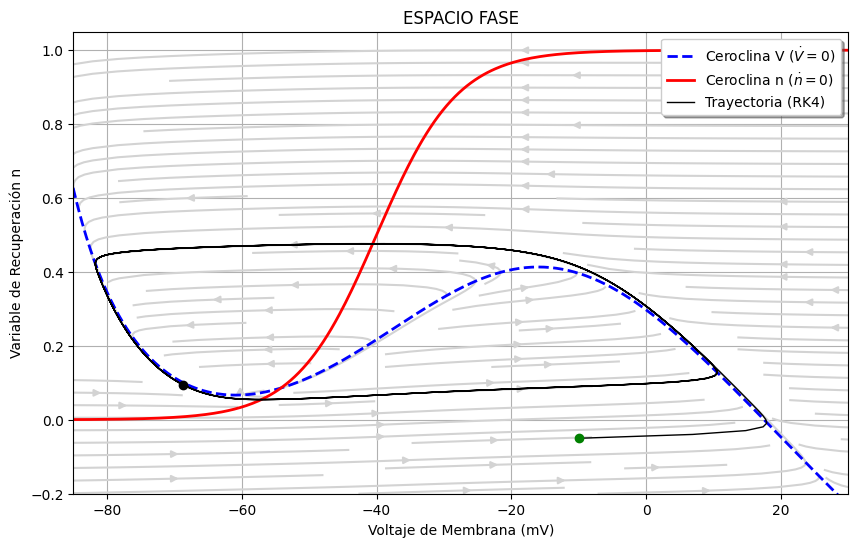

In [7]:
# Intervalos para el campo y nuclinas
v_interval = np.arange(-90.0, 50.0, 2.0)
n_interval = np.arange(-0.2, 1.1, 0.1)
V_mesh, n_mesh = np.meshgrid(v_interval, n_interval) # mallado

# Componentes del sistema no lineal
m_inf_mesh = sigmoide_vec(V_mesh, V_half_m, km)
n_inf_mesh = sigmoide_vec(V_mesh, V_half_n, kn)
I_L_mesh = q_neuro['g_L'] * (V_mesh - q_neuro['E_L'])
I_Na_mesh = q_neuro['g_Na'] * m_inf_mesh * (V_mesh - q_neuro['E_Na'])
I_K_mesh = q_neuro['g_K'] * n_mesh * (V_mesh - q_neuro['E_K'])

# Sistema no lineal
dV_dt = (q_neuro['I_inyec'] - I_L_mesh - I_Na_mesh - I_K_mesh) / q_neuro['C_m']
dn_dt = (n_inf_mesh - n_mesh) / q_neuro['tau_n']


# Ceroclinas del sistema
def V_nullcline(V_arr):
    m_val = sigmoide_vec(V_arr, V_half_m, km)
    num = q_neuro['I_inyec'] - q_neuro['g_L']*(V_arr - q_neuro['E_L']) - q_neuro['g_Na']*m_val*(V_arr - q_neuro['E_Na'])
    den = q_neuro['g_K'] * (V_arr - q_neuro['E_K'])
    return num / den

def n_nullcline(V_arr):
    return sigmoide_vec(V_arr, V_half_n, kn)

# --- Grafica del espacio fase ---
gr.figure(figsize=(10, 6))
gr.title('ESPACIO FASE')
gr.xlabel('Voltaje de Membrana (mV)')
gr.ylabel('Variable de Recuperación n')

#  Campo de Direcciones (flujo del sistema)
gr.streamplot(V_mesh, n_mesh, dV_dt, dn_dt, color='lightgrey', density=1.2)

#  Intersección de ceroclinas (punto fijo)
## el pf se calcula analíticamente

# Ceroclinas
v_plot = np.linspace(-90, 60, 500)
gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')

# Trayectoria numérica (solución RK4)
gr.plot(x_orbit, y_orbit, 'k', linewidth=1.0, label='Trayectoria (RK4)')
gr.plot(x_orbit[0], y_orbit[0], 'go', zorder=5) # Punto inicio
gr.plot(x_orbit[-1], y_orbit[-1], 'ko', zorder=5) # Punto final

# Ajustes
gr.axis([-85, 30, -0.2, 1.05])
gr.legend(loc='upper right', shadow=True)
gr.grid(True)
gr.show()


<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
<>:38: SyntaxWarning: invalid escape sequence '\d'
<>:39: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-1093394643.py:38: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
/tmp/ipython-input-1093394643.py:39: SyntaxWarning: invalid escape sequence '\d'
  gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')


Punto de equilibrio encontrado:
V* = -54.171319, n* = 0.086126


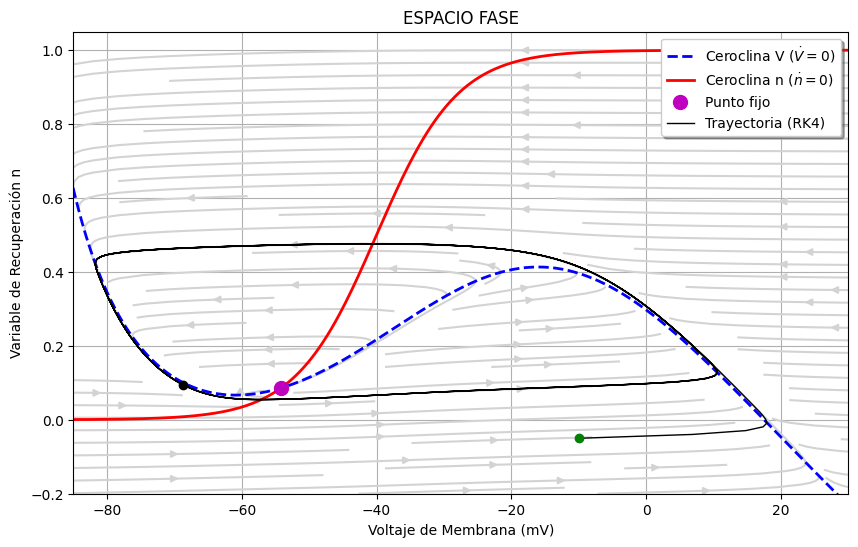

In [8]:
# Intervalos para el campo y nuclinas
v_interval = np.arange(-90.0, 50.0, 2.0)
n_interval = np.arange(-0.2, 1.1, 0.1)
V_mesh, n_mesh = np.meshgrid(v_interval, n_interval) # mallado

# Componentes del sistema no lineal
m_inf_mesh = sigmoide_vec(V_mesh, V_half_m, km)
n_inf_mesh = sigmoide_vec(V_mesh, V_half_n, kn)
I_L_mesh = q_neuro['g_L'] * (V_mesh - q_neuro['E_L'])
I_Na_mesh = q_neuro['g_Na'] * m_inf_mesh * (V_mesh - q_neuro['E_Na'])
I_K_mesh = q_neuro['g_K'] * n_mesh * (V_mesh - q_neuro['E_K'])

# Sistema no lineal
dV_dt = (q_neuro['I_inyec'] - I_L_mesh - I_Na_mesh - I_K_mesh) / q_neuro['C_m']
dn_dt = (n_inf_mesh - n_mesh) / q_neuro['tau_n']

# Ceroclinas del sistema
def V_nullcline(V_arr):
    m_val = sigmoide_vec(V_arr, V_half_m, km)
    num = q_neuro['I_inyec'] - q_neuro['g_L']*(V_arr - q_neuro['E_L']) - q_neuro['g_Na']*m_val*(V_arr - q_neuro['E_Na'])
    den = q_neuro['g_K'] * (V_arr - q_neuro['E_K'])
    return num / den

def n_nullcline(V_arr):
    return sigmoide_vec(V_arr, V_half_n, kn)

# Gráfica del espacio fase
gr.figure(figsize=(10, 6))
gr.title('ESPACIO FASE')
gr.xlabel('Voltaje de Membrana (mV)')
gr.ylabel('Variable de Recuperación n')

# Campo de direcciones
gr.streamplot(V_mesh, n_mesh, dV_dt, dn_dt, color='lightgrey', density=1.2)

# Ceroclinas
v_plot = np.linspace(-90, 60, 500)
gr.plot(v_plot, V_nullcline(v_plot), 'b--', linewidth=2, label='Ceroclina V ($\dot{V}=0$)')
gr.plot(v_plot, n_nullcline(v_plot), 'r-', linewidth=2, label='Ceroclina n ($\dot{n}=0$)')

# === Cálculo del punto de intersección ===
from scipy.optimize import brentq

def diff(V):
    return V_nullcline(np.array([V]))[0] - n_nullcline(np.array([V]))[0]

V_range = np.linspace(-90, 60, 2000)
f_vals = V_nullcline(V_range) - n_nullcline(V_range)

V_star = None
for i in range(len(V_range)-1):
    if np.isfinite(f_vals[i]) and np.isfinite(f_vals[i+1]):
        if f_vals[i] * f_vals[i+1] < 0:
            V_star = brentq(diff, V_range[i], V_range[i+1])
            break

if V_star is not None:
    n_star = n_nullcline(np.array([V_star]))[0]
    gr.plot(V_star, n_star, 'mo', markersize=10, label='Punto fijo')
    print("Punto de equilibrio encontrado:")
    print(f"V* = {V_star:.6f}, n* = {n_star:.6f}")
else:
    print("No se encontró intersección de ceroclinas en el rango dado.")

# Trayectoria numérica (RK4)
gr.plot(x_orbit, y_orbit, 'k', linewidth=1.0, label='Trayectoria (RK4)')
gr.plot(x_orbit[0], y_orbit[0], 'go', zorder=5)  # inicio
gr.plot(x_orbit[-1], y_orbit[-1], 'ko', zorder=5)  # final

# Ajustes
gr.axis([-85, 30, -0.2, 1.05])
gr.legend(loc='upper right', shadow=True)
gr.grid(True)
gr.show()


In [9]:
# === Cálculo del punto de intersección ===
from scipy.optimize import brentq
import numpy as np

def diff(V):
    return float(V_nullcline(np.array([V]))[0] - n_nullcline(np.array([V]))[0])

V_range = np.linspace(-90, 60, 2000)
f_vals = V_nullcline(V_range) - n_nullcline(V_range)

V_star = None
for i in range(len(V_range)-1):
    if np.isfinite(f_vals[i]) and np.isfinite(f_vals[i+1]):
        if f_vals[i] * f_vals[i+1] < 0:
            V_star = float(brentq(diff, V_range[i], V_range[i+1]))
            break

if V_star is not None:
    n_star = float(n_nullcline(np.array([V_star]))[0])

    # guardar como floats 100% seguros
    equilibrio = [V_star, n_star]

    print("Punto de equilibrio encontrado:")
    print(f"V* = {V_star:.6f}, n* = {n_star:.6f}")
    print("equilibrio =", equilibrio)

else:
    print("No se encontró intersección de ceroclinas en el rango dado.")


Punto de equilibrio encontrado:
V* = -54.171319, n* = 0.086126
equilibrio = [-54.171319366075046, 0.08612559111607171]


In [10]:
type(equilibrio[0])

float

In [11]:
import sympy as sm
import numpy as np

# ================================
# 1. Parámetros numéricos
# ================================
g_L   = q_neuro['g_L']
E_L   = q_neuro['E_L']
g_Na  = q_neuro['g_Na']
E_Na  = q_neuro['E_Na']
g_K   = q_neuro['g_K']
E_K   = q_neuro['E_K']
Iext  = q_neuro['I_inyec']

V_half_m = -20
k_m      = 16
V_half_n = -40
k_n      = 6

# Equilibrio numérico que YA calculaste
equilibrio = [float(V_star), float(n_star)]


# ================================
# 2. Definición simbólica del sistema
# ================================
V, n = sm.symbols('V n')

# sigmoides simbólicas
m_inf = 1 / (1 + sm.exp(-(V - V_half_m)/k_m))
n_inf = 1 / (1 + sm.exp(-(V - V_half_n)/k_n))

# Ecuaciones simbólicas
dV = Iext - g_L*(V - E_L) - g_Na*m_inf*(V - E_Na) - g_K*n*(V - E_K)
dn = (n_inf - n)  # suponiendo tau_n = 1 para análisis local

# Sistema vectorial
eqVec = sm.Matrix([dV, dn])
varsV = sm.Matrix([V, n])

# Jacobiano simbólico
J = eqVec.jacobian(varsV)


# ================================
# 3. Evaluación del jacobiano en el equilibrio
# ================================
V_eq = equilibrio[0]
n_eq = equilibrio[1]

J_num = J.subs({V: V_eq, n: n_eq})

print("\n=== Jacobiano evaluado en el equilibrio ===")
print(J_num)


# ================================
# 4. Valores propios y clasificación
# ================================
eigs = J_num.eigenvals()  # diccionario {λ: multiplicidad}

lambdas = list(eigs.keys())
l1 = complex(lambdas[0])
l2 = complex(lambdas[1])

print("\n=== Valores propios ===")
print(f"λ₁ = {l1}")
print(f"λ₂ = {l2}")

tr = float(J_num.trace())
det = float(J_num.det())
Delta = tr**2 - 4*det

print("\n=== Clasificación ===")

if det < 0:
    print("➤ Silla (saddle).")
elif det > 0:
    if tr < 0:
        if Delta < 0:
            print("➤ Espiral estable.")
        elif Delta > 0:
            print("➤ Nodo estable.")
        else:
            print("➤ Nodo degenerado estable.")
    elif tr > 0:
        if Delta < 0:
            print("➤ Espiral inestable.")
        elif Delta > 0:
            print("➤ Nodo inestable.")
        else:
            print("➤ Nodo degenerado inestable.")
    else:
        print("➤ Centro (traza=0).")
else:
    print("➤ Punto degenerado (det=0).")



=== Jacobiano evaluado en el equilibrio ===
Matrix([[2.51278615073656, -458.286806339250], [0.0131179956118298, -1]])

=== Valores propios ===
λ₁ = (0.7563930753682795-1.7108149167329998j)
λ₂ = (0.7563930753682795+1.7108149167329998j)

=== Clasificación ===
➤ Espiral inestable.
